In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [84]:
df = pd.read_csv('./data/marketing_campaign.csv', sep="\t")
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [85]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# EDA
## Univariate Analysis
histograms for each feature in the df

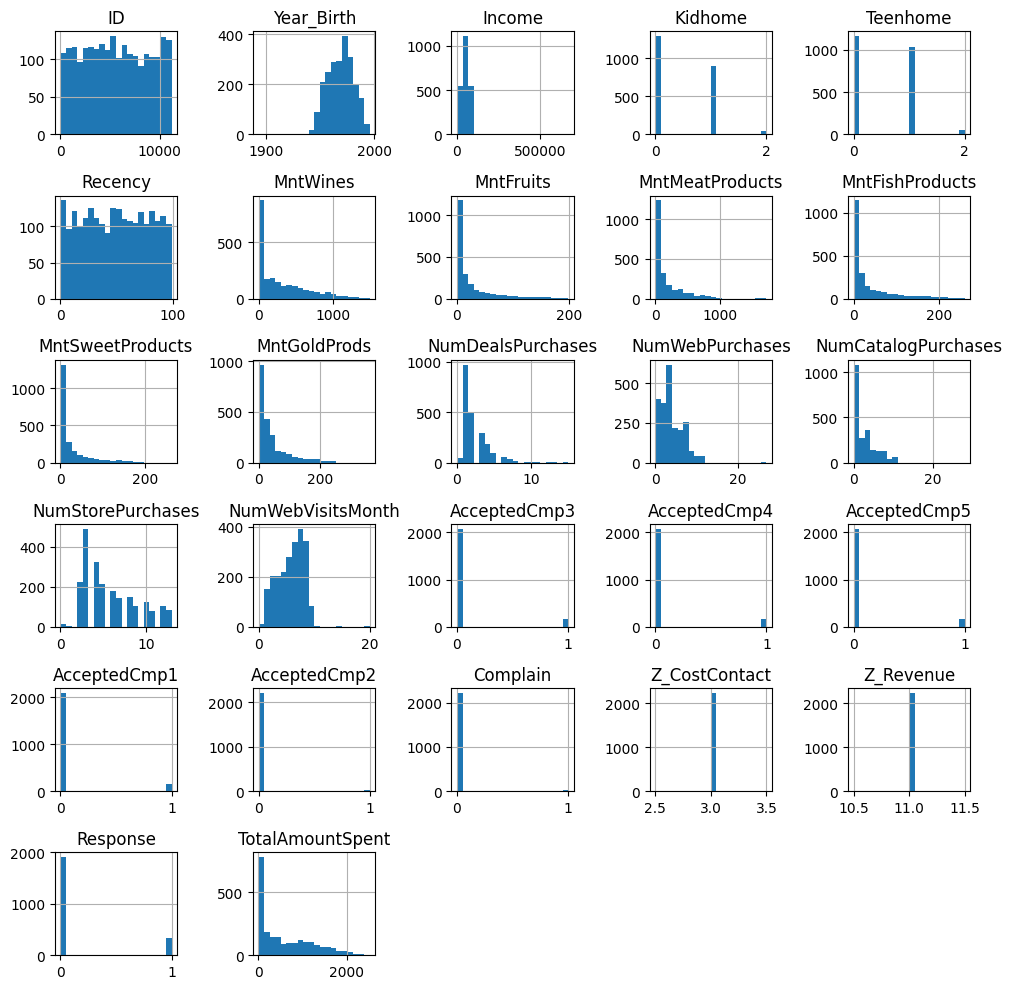

In [87]:
df["TotalAmountSpent"] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntSweetProducts"] + df["MntMeatProducts"] + df["MntWines"]
df.hist(bins=20, figsize=(10, 10))
plt.tight_layout()
plt.show()

### Birth Year
Convert birth year into an age feature

In [88]:
from datetime import datetime

In [89]:
df['Age'] = df['Year_Birth'].apply(lambda x: datetime.now().year - x)
df['Age'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age Distribution')

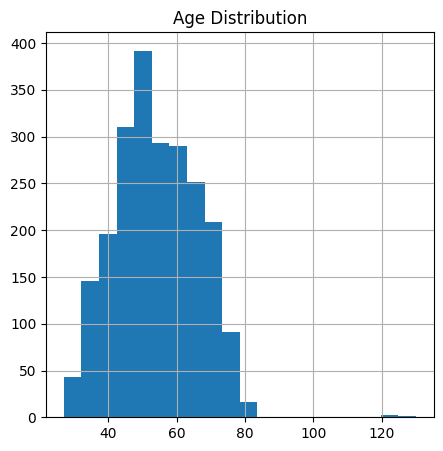

In [90]:
df['Age'].hist(bins=20, figsize=(5, 5))
plt.title('Age Distribution')

## Education

In [91]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [92]:
df["Education"] = df["Education"].replace({"Graduation":"Graduate", "PhD":"Postgraduate", "Master":"Postgraduate", "2n Cycle":"Postgraduate", "Basic":"Undergraduate"})
df['Education'].value_counts()

Education
Graduate         1127
Postgraduate     1059
Undergraduate      54
Name: count, dtype: int64

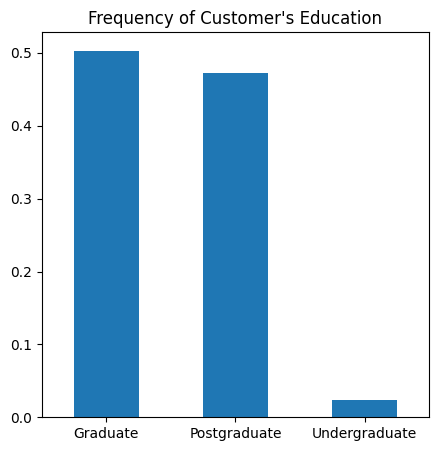

In [93]:
df['Education'].value_counts(normalize=True).plot.bar(figsize=(5, 5))
plt.xticks(rotation=0)
plt.title("Frequency of Customer's Education")
plt.xlabel('')
plt.show()

## Marital Status

In [94]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [95]:
df["Marital_Status"] = df["Marital_Status"].replace({"Together":"Married", "Absurd":"Single", "Divorced":"Single", "Alone":"Single", "YOLO":"Single", "Widow":"Single"})

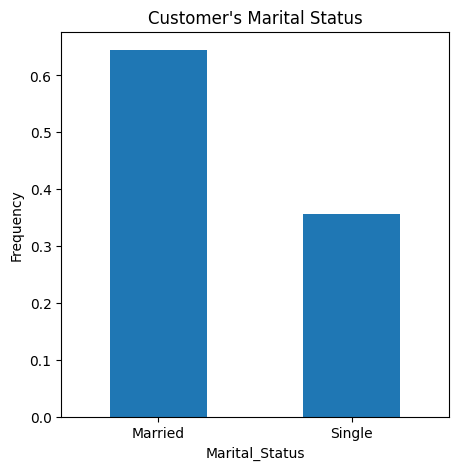

In [96]:
df['Marital_Status'].value_counts(normalize=True).plot.bar(figsize=(5, 5))
plt.xticks(rotation=0)
plt.title("Customer's Marital Status")
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, "Distribution of Customer's Income")

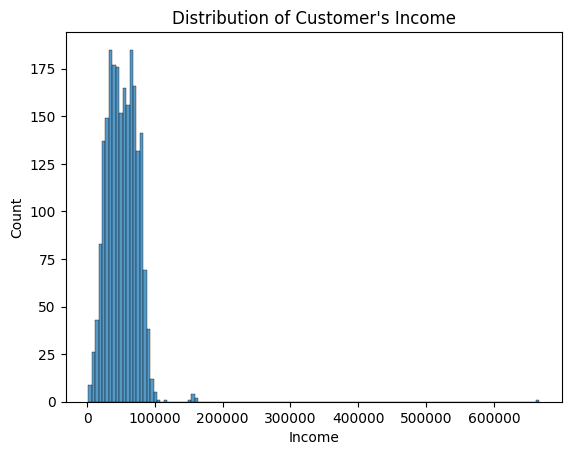

In [97]:
sns.histplot(data=df, x="Income")
plt.title("Distribution of Customer's Income")

## Kid Home

In [98]:
df['Kidhome'].value_counts()

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

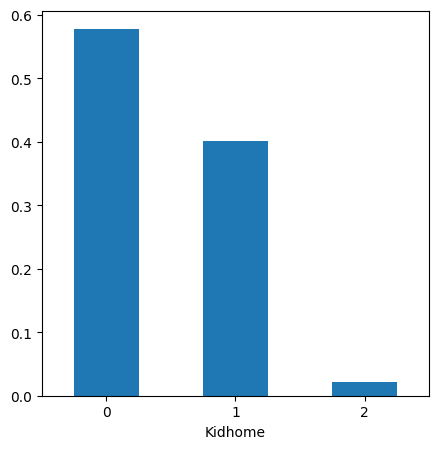

In [99]:
df['Kidhome'].value_counts(normalize=True).plot.bar(figsize=(5, 5))
plt.xticks(rotation=0)

## Teen Home

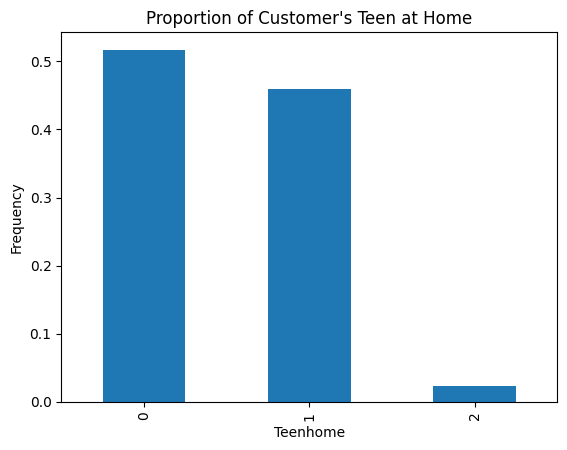

In [100]:
df["Teenhome"].value_counts(normalize=True).plot.bar()
plt.ylabel("Frequency")
plt.title("Proportion of Customer's Teen at Home");

## Total Children

In [101]:
df['total_children'] = df['Kidhome'] + df['Teenhome']
df['total_children'].value_counts()

total_children
1    1128
0     638
2     421
3      53
Name: count, dtype: int64

<Axes: xlabel='total_children'>

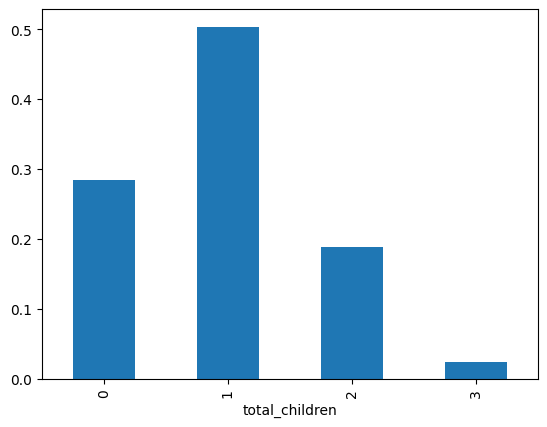

In [102]:
df["total_children"].value_counts(normalize=True).sort_index().plot.bar()

## Total Spent

In [103]:
df['TotalAmountSpent'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: TotalAmountSpent, dtype: float64

<Axes: xlabel='TotalAmountSpent', ylabel='Percent'>

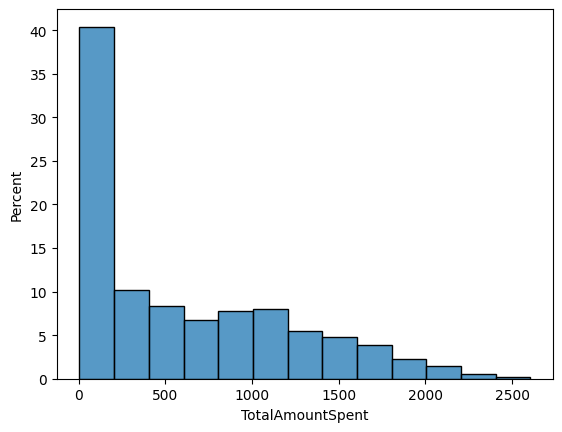

In [104]:
sns.histplot(data=df, x="TotalAmountSpent", binwidth=200, stat="percent")

# Bivariate Analysis

### Age VS Total Amount Spent

Text(0.5, 1.0, 'Relationship between Age and Total Amount Spent')

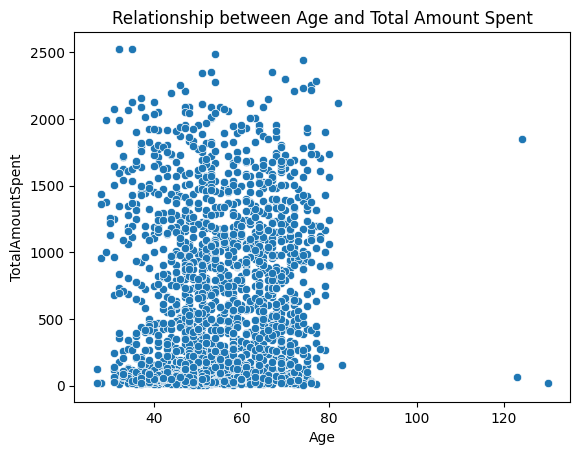

In [105]:
sns.scatterplot(data=df, x="Age", y="TotalAmountSpent")
plt.title("Relationship between Age and Total Amount Spent")

<Axes: >

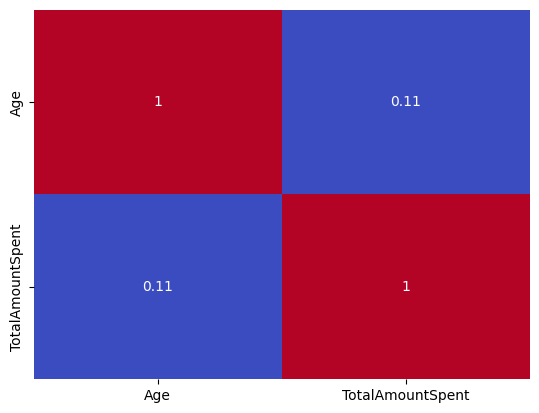

In [106]:
sns.heatmap(df.loc[:, ['Age', 'TotalAmountSpent']].corr(), annot=True, cmap="coolwarm", cbar=False)

### Education VS Total Amount Spent

Text(0.5, 1.0, 'Relationship between Age Range and Total Amount Spent')

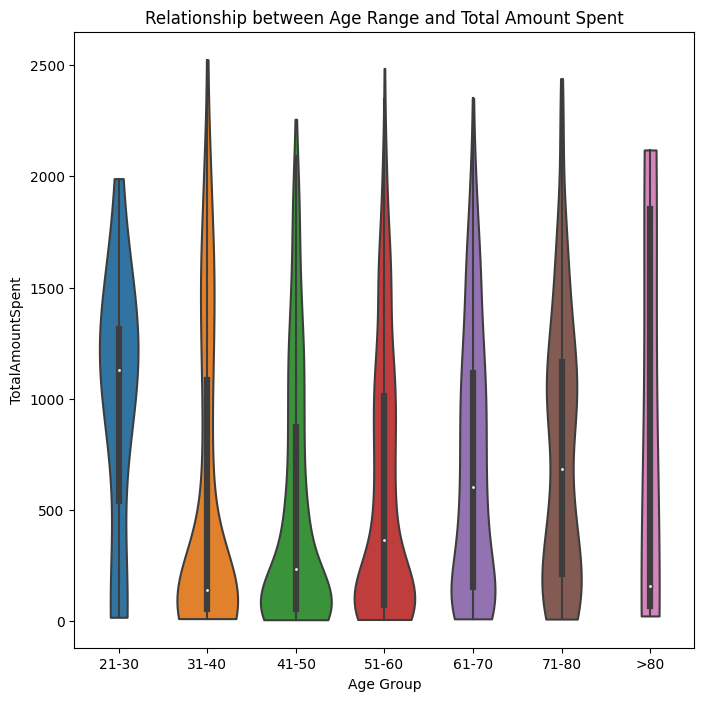

In [107]:
def group_age(age):
    if age <20:
        return "11-20"
    elif age > 20 and age <31:
        return "21-30"
    elif age > 30 and age <41:
        return "31-40"
    elif age > 40 and age <51:
        return "41-50"
    elif age > 50 and age <61:
        return "51-60"
    elif age > 60 and age <71:
        return "61-70"
    elif age > 70 and age <81:
        return "71-80"
    elif age > 80:
        return ">80"
    
df["Age Group"] =df["Age"].apply(group_age)

# To order plotly index
order = ["21-30", "31-40", "41-50", "51-60", "61-70", "71-80", ">80"]

mask = df.groupby("Age Group")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Age Group", y="TotalAmountSpent", height=500)

annotation = []
for x, y in zip(mask["Age Group"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +20,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)
plt.figure(figsize=(8, 8))
sns.violinplot(x="Age Group", y="TotalAmountSpent", data=df, cut=0, order=order)
plt.title("Relationship between Age Range and Total Amount Spent")


In [108]:
from scipy.stats import iqr


In [109]:
iqr = iqr(df["Income"], nan_policy="omit")
low = np.nanquantile(df["Income"], 0.25) - 1.5 * iqr
high = np.nanquantile(df["Income"], 0.75) + 1.5 * iqr
df_cut = df[df["Income"].between(low, high)]

In [110]:
mask = df_cut.groupby("Age Group")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Age Group", y="Income", height=500)

annotation = []
for x, y in zip(mask["Age Group"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)


In [111]:
mask = df_cut.groupby("Education")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Education", y="Income", height=500,
            title = "Relationsip Between Customer's Education Level and Income [Average Income]")

annotation = []
for x, y in zip(mask["Education"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +1500,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)



In [112]:
mask = df.groupby("Marital_Status")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Marital_Status", y="TotalAmountSpent", height=500, 
             title="Relationship between Customer's Marital Status and Total Amount Spent [Average Spent]")

annotation = []
for x, y in zip(mask["Marital_Status"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)


## Multivariate Analysis
### Education VS Income VS TotalAmountSpent

In [113]:
fig = px.scatter(
    data_frame=df_cut,
    x = "Income",
    y= "TotalAmountSpent",
    title = "Relationship between Income VS Total Amount Spent Based on Education",
    color = "Education",
    height=500
)
fig.show()


In [114]:
fig = px.scatter(
    data_frame=df_cut,
    x = "Income",
    y= "TotalAmountSpent",
    title = "Relationship between Income VS Total Amount Spent Based on Education",
    color = "total_children",
    height=500
)
fig.show()

## KMeans Model
Kmeans Model using two Features to Segment the Customers Demographic and Behaviour "Income" and "Total Amount Spent"

In [115]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
TotalAmountSpent        0
Age                     0
total_children          0
Age Group               0
dtype: int64

In [116]:
df["Income"].fillna(df["Income"].median(), inplace=True)

In [117]:
data = df[["Income", "TotalAmountSpent"]]
df_log = np.log(data)

In [118]:
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df_log)
scaled_df = pd.DataFrame(scaled_df, columns=["Income", "TotalAmountSpent"])

In [119]:
errors = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k).fit(scaled_df)
    errors.append(kmeans.inertia_)

e:\Ahmed Zayed\Projects\Machine Learning\001_wine_quality\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

e:\Ahmed Zayed\Projects\Machine Learning\001_wine_quality\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

e:\Ahmed Zayed\Projects\Machine Learning\001_wine_quality\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

e:\Ahmed Zayed\Projects\Machine Learning\001_wine_quality\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

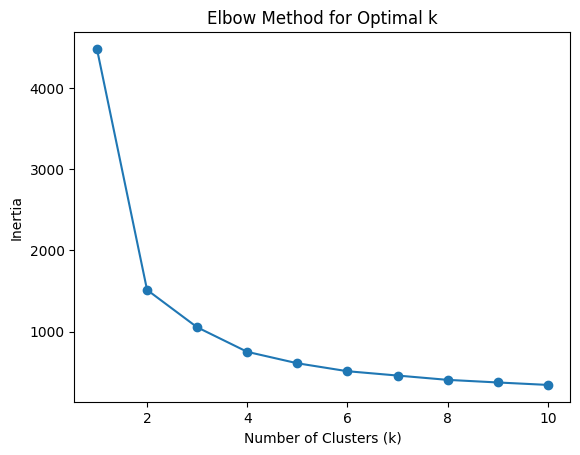

In [120]:
plt.plot(range(1, 11), errors, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [121]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(scaled_df)

e:\Ahmed Zayed\Projects\Machine Learning\001_wine_quality\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [122]:
data = data.assign(ClusterLabel= model.labels_)
scaled_df = scaled_df.assign(ClusterLabel= model.labels_)

In [123]:
data.groupby("ClusterLabel")[["Income", "TotalAmountSpent"]].median()

,Income,TotalAmountSpent
ClusterLabel,,
0,69084.0,1069.5
1,25261.5,43.0
2,42641.0,145.0


In [124]:
fig = px.scatter(
    data_frame=data,
    x = "Income",
    y= "TotalAmountSpent",
    title = "Relationship between Income VS Total Amount Spent",
    color = "ClusterLabel",
    height=500
)
fig.show()

### rebuild the model with 3 features

In [125]:
data = df[["Age", "Income", "TotalAmountSpent"]]
df_log = np.log(data)
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

In [126]:
sse = {}
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    sse[k] = model.inertia_

e:\Ahmed Zayed\Projects\Machine Learning\001_wine_quality\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

e:\Ahmed Zayed\Projects\Machine Learning\001_wine_quality\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

e:\Ahmed Zayed\Projects\Machine Learning\001_wine_quality\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

e:\Ahmed Zayed\Projects\Machine Learning\001_wine_quality\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

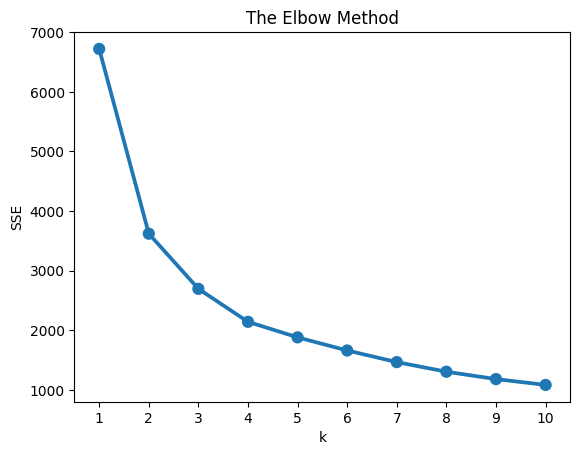

In [127]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [128]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df_scaled)


data = data.assign(ClusterLabel= model.labels_)

e:\Ahmed Zayed\Projects\Machine Learning\001_wine_quality\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [129]:
data.head()

,Age,Income,TotalAmountSpent,ClusterLabel
0,66,58138.0,1617,2
1,69,46344.0,27,1
2,58,71613.0,776,2
3,39,26646.0,53,3
4,42,58293.0,422,0


In [130]:
result = data.groupby("ClusterLabel").agg({"Age":"mean", "Income":"median", "TotalAmountSpent":"median"}).round()


In [131]:
result

,Age,Income,TotalAmountSpent
ClusterLabel,,,
0,45.0,67023.0,990.0
1,56.0,37264.0,61.0
2,66.0,64140.0,902.0
3,42.0,24384.0,54.0


In [132]:
fig = px.scatter_3d(data_frame=data, 
                    x="Income", 
                    y="TotalAmountSpent", 
                    z="Age", 
                    color="ClusterLabel", 
                    height=700,
                    title = "Visualizing Cluster Result Using 3 Features"
                    )
fig.show()